## PROBLEM STATEMENT

#### Understanding the problem

## HYPOTHESIS GENERATION

## IMPORT NECESSARY DEPENDENCIES

In [24]:
import missingno as msno
from sklearn.model_selection import KFold, cross_val_score, GroupKFold, RepeatedKFold
import plotly.express as px
import pandas as pd
import numpy as np
import math
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from tqdm import tqdm
import time
import copy
import warnings
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn import model_selection
import xgboost as xgb
import seaborn as sns
import lightgbm as lgb
from sklearn import metrics
from scipy.optimize import minimize
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

## DATA PATH ON DEVICE

In [25]:
data_path ='/Users/DELL/Desktop/Hackhathons/Store/'
input_path ='/Users/DELL/Desktop/Hackhathons/Store/'
save_path = '/Users/DELL/Desktop/Hackhathons/Store/'
trains='train.csv'
tests='test.csv'
submissions='SampleSubmission.csv'

### A FXN TO READ DATA

In [26]:
def read_train():
    train =pd.read_csv(data_path + trains)
    return train
def read_test():
    test =pd.read_csv(data_path + tests)
    return test
def read_submission():
    submission =pd.read_csv(data_path + submissions,)
    return submission
train = read_train();test=read_test();submission=read_submission()

### DATA EXPLORATION

In [27]:
train.columns

Index(['Item_ID', 'Store_ID', 'Item_Store_ID', 'Item_Weight',
       'Item_Sugar_Content', 'Item_Visibility', 'Item_Type', 'Item_Price',
       'Store_Start_Year', 'Store_Size', 'Store_Location_Type', 'Store_Type',
       'Item_Store_Returns'],
      dtype='object')

In [28]:
train.sample()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
681,FDB36,BABATUNJI046,FDB36_BABATUNJI046,5.465,Normal Sugar,0.0,Baking Goods,322.91,2004,Small,Cluster 1,Supermarket Type1,9181.38


In [29]:
print('==' * 18);print('TRAIN DATA');print(train.shape)
print('==' * 18);print('TEST DATA');print(test.shape)
print('==' * 18);print('SUBMISSION SAMPLE DATA');print(submission.shape)

TRAIN DATA
(4990, 13)
TEST DATA
(3532, 12)
SUBMISSION SAMPLE DATA
(3532, 2)


In [30]:
#Lets Check for Item co-existence in Train/Test
for col in ['Item_ID','Store_ID']:
    train_col = train[col].unique();test_col = test[col].unique()
    print ('Not in Test ' + col + ' ',[i  for i in train_col if i not in test_col]);print('----'*10)
    print ('Not in Train ' + col + ' ',[i  for i in test_col  if i not in train_col]);print('==' * 30)

Not in Test Item_ID  ['DRA12', 'DRA24', 'DRB24', 'DRC12', 'DRC24', 'DRC49', 'DRE37', 'DRE49', 'DRF01', 'DRF13', 'DRF15', 'DRF23', 'DRF27', 'DRF48', 'DRG03', 'DRG13', 'DRG23', 'DRG37', 'DRG48', 'DRG51', 'DRH01', 'DRH37', 'DRI23', 'DRI47', 'DRI51', 'DRI59', 'DRJ01', 'DRJ13', 'DRJ37', 'DRK11', 'DRL11', 'DRL49', 'DRL60', 'DRM35', 'DRM59', 'DRN11', 'FDA02', 'FDA03', 'FDA08', 'FDA09', 'FDA14', 'FDA19', 'FDA22', 'FDA31', 'FDA33', 'FDA47', 'FDB08', 'FDB09', 'FDB22', 'FDB33', 'FDB38', 'FDB40', 'FDB46', 'FDB53', 'FDB58', 'FDC05', 'FDC15', 'FDC23', 'FDC34', 'FDC38', 'FDC45', 'FDC52', 'FDD04', 'FDD22', 'FDD23', 'FDD34', 'FDD46', 'FDD56', 'FDE05', 'FDE08', 'FDE17', 'FDE22', 'FDE24', 'FDE26', 'FDE36', 'FDE38', 'FDE46', 'FDE47', 'FDE50', 'FDF10', 'FDF12', 'FDF14', 'FDF16', 'FDF17', 'FDF26', 'FDF40', 'FDF50', 'FDF57', 'FDF59', 'FDG02', 'FDG04', 'FDG05', 'FDG14', 'FDG21', 'FDG35', 'FDG53', 'FDG58', 'FDH14', 'FDH21', 'FDH22', 'FDH24', 'FDH27', 'FDH34', 'FDH35', 'FDH44', 'FDH46', 'FDI26', 'FDI35', 'FDI41

In [31]:
train.sample()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
2130,FDN46,BABATUNJI018,FDN46_BABATUNJI018,7.21,Normal Sugar,0.145221,Snack Foods,257.83,2016,Medium,Cluster 3,Supermarket Type2,4613.99


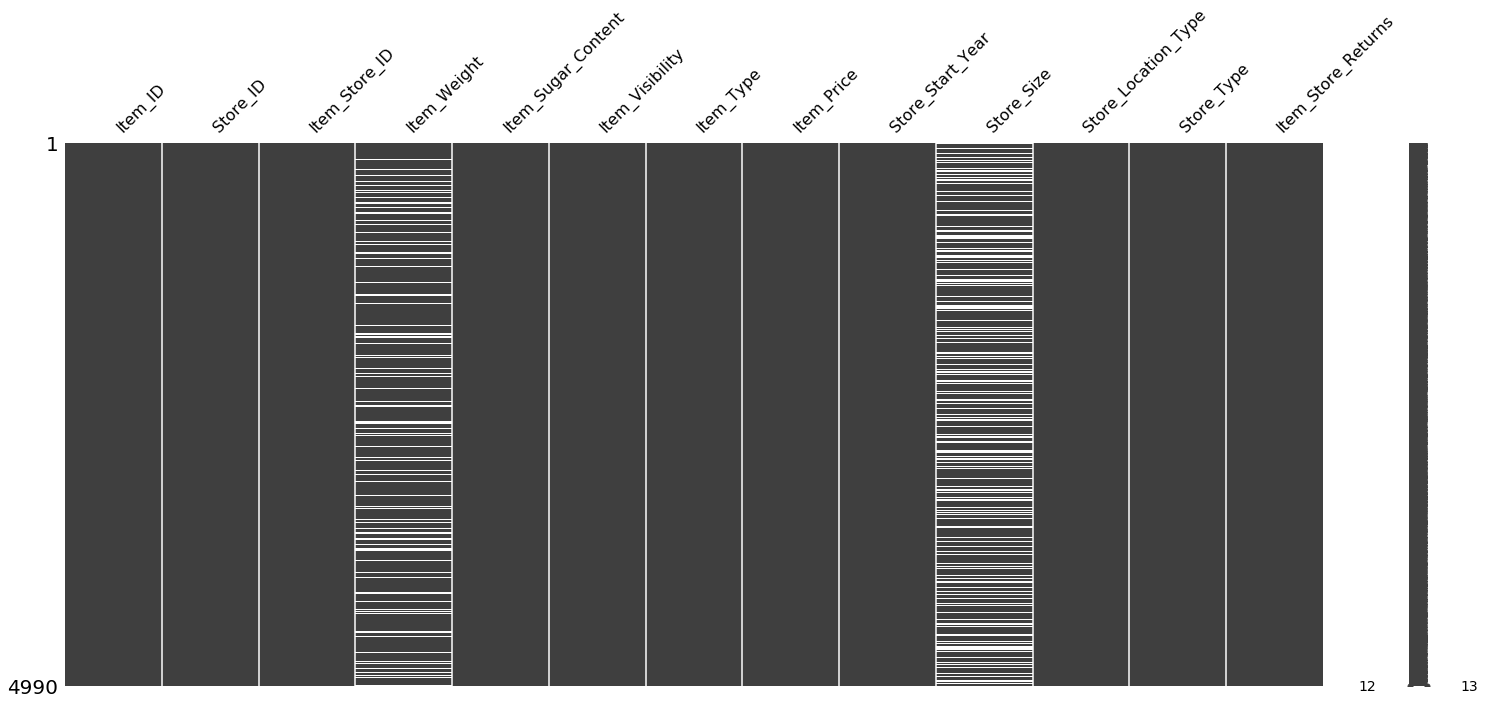

In [32]:
msno.matrix(train)

In [33]:
train.isna().sum()

Item_ID                   0
Store_ID                  0
Item_Store_ID             0
Item_Weight             802
Item_Sugar_Content        0
Item_Visibility           0
Item_Type                 0
Item_Price                0
Store_Start_Year          0
Store_Size             1450
Store_Location_Type       0
Store_Type                0
Item_Store_Returns        0
dtype: int64

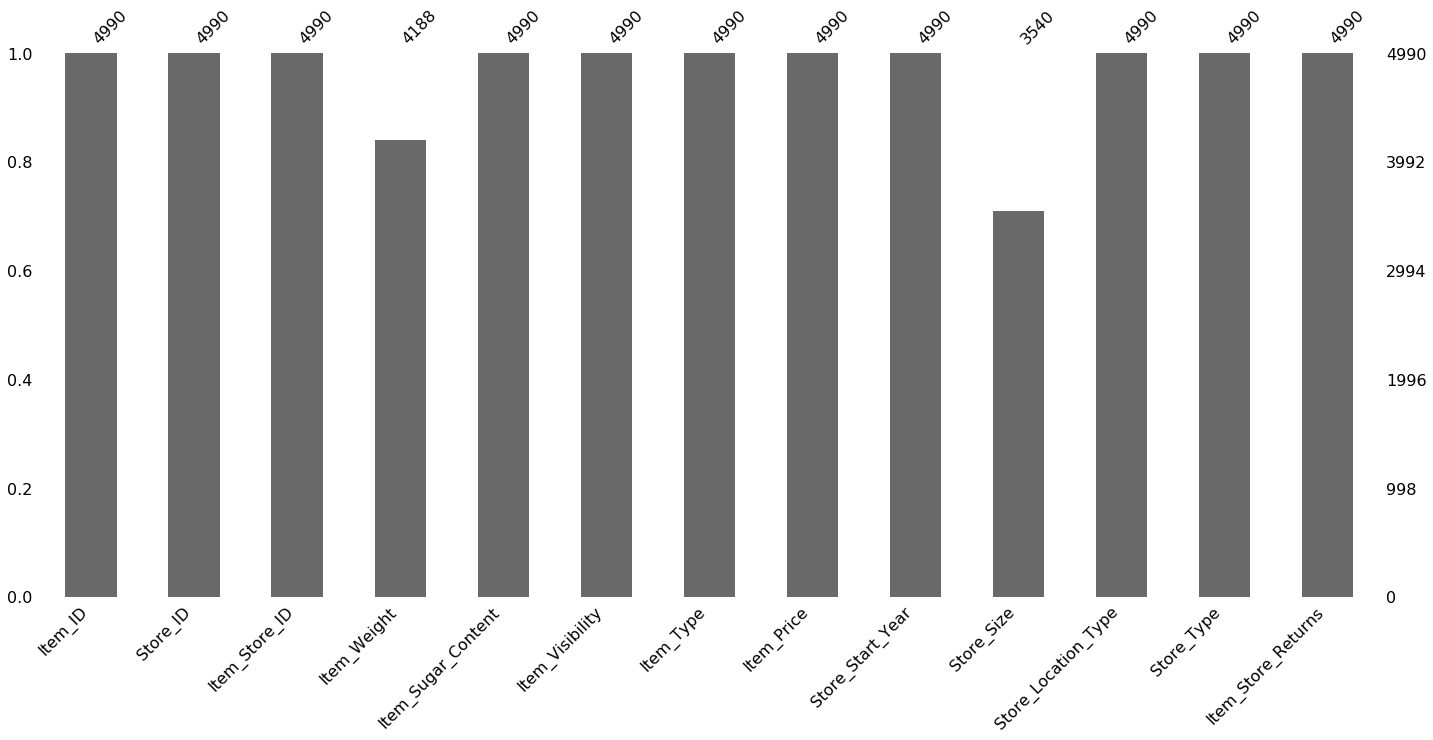

In [34]:
msno.bar(train)

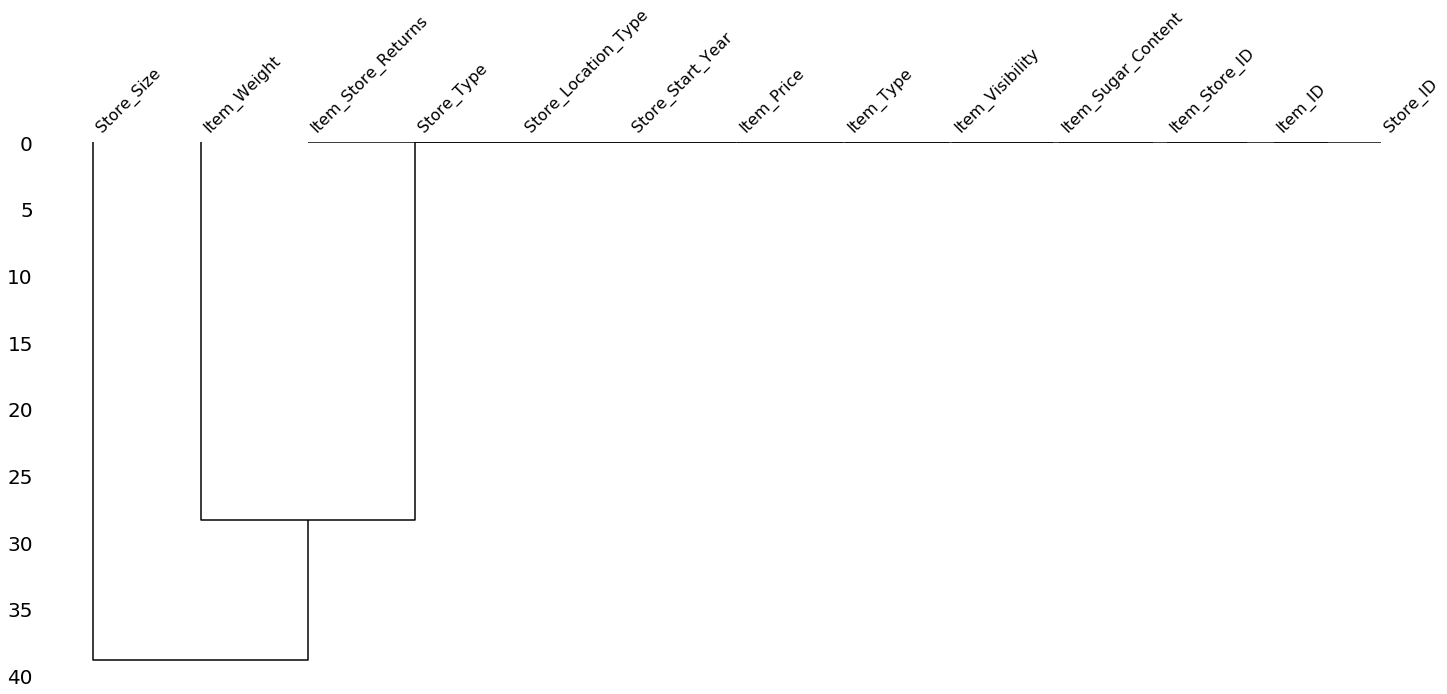

In [35]:
#It splits using the minimum distance between the clusters that are created using hierarchial clustering algorithm
msno.dendrogram(train)

In [36]:
#check for mixed data type
train._is_mixed_type

True

In [37]:
#columns with float data types
float_dtypes = train.loc[:, train.dtypes == np.float64];float_dtypes.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_Price', 'Item_Store_Returns'], dtype='object')

In [38]:
#columns with integer data types
int_dtypes = train.loc[:, train.dtypes == np.int64];int_dtypes.columns

Index(['Store_Start_Year'], dtype='object')

In [39]:
#columns with object data types
object_dtypes = train.loc[:, train.dtypes == np.object];object_dtypes.columns

Index(['Item_ID', 'Store_ID', 'Item_Store_ID', 'Item_Sugar_Content',
       'Item_Type', 'Store_Size', 'Store_Location_Type', 'Store_Type'],
      dtype='object')

# UNIVARIATE ANALYSIS

### COUNTS

In [1214]:
def UNIVARIATE_SUMMARY(train):
    print('==' * 15, 'EXCELLENT STORE ANALYSIS', '==' * 15)
    time.sleep(1.5)
    print('PRODUCT_ID - There are ',train.Item_ID.nunique(), 'unique product across all stores')
    print('STORE_ID - There are ',train.Store_ID.nunique(), 'different stores or branch')
    print('MINMAX WEIGHT OF AN ITEM - Min item weight of',train.Item_Weight.min(), 'and Max item weight of',
          train.Item_Weight.max())
    print('ITEM_STORE_ID - There are ',train.Item_Store_ID.nunique(), 'unique  ITS_ID existing in the business');print('***')
    print('NUM/CLASSES FOR ITEM_SUGAR_CONTENT -',  train.Item_Sugar_Content.nunique(), train.Item_Sugar_Content.unique())
    print('NUM/CLASSES FOR ITEM_TYPE -',  train.Item_Type.nunique(), train.Item_Type.unique())
    print('NUM/CLASSES FOR ITEM_VISIBILITY -',  'MIN',train.Item_Visibility.min()*100, 'MEAN' ,
          np.round(train.Item_Visibility.mean(),3)*100,
         'MAX',np.round(train.Item_Visibility.max()*100,2));print('***')
    print('RETAIL PRICE OF ITEM RANGES BETWEEN',np.round(train.Item_Price.min(),2),
          ' - ',np.round(train.Item_Price.max(),2),'Naira')
    print('Store_Start_Year of ', 'MIN MEAN MAX are',train.Store_Start_Year.min(),
          np.round(train.Store_Start_Year.mean(),0).astype(int),
          train.Store_Start_Year.max(),'respectively')
    print('Store_Size - ',train.Store_Size.unique())
    print('STORE TYPE - There exist 4 different store type namely',train.Store_Type.unique());print('***')
    print('Cities - Products are sold across' ,train.Store_Location_Type.nunique(),
          'cities','namely', train.Store_Location_Type.unique())
    print('Item_Store_Returns MIN MEAN MAX are ', np.round(train.Item_Store_Returns.min(),0).astype(int),
          np.round(train.Item_Store_Returns.mean(),0).astype(int),
         np.round(train.Item_Store_Returns.max(),0).astype(int),'respectively')

In [1215]:
UNIVARIATE_SUMMARY(train)

============================== EXCELLENT STORE ANALYSIS ==============================
PRODUCT_ID - There are  1451 unique product across all stores
STORE_ID - There are  10 different stores or branch
MINMAX WEIGHT OF AN ITEM - Min item weight of 4.555 and Max item weight of 21.35
ITEM_STORE_ID - There are  4990 unique  ITS_ID existing in the business
***
NUM/CLASSES FOR ITEM_SUGAR_CONTENT - 3 ['Low Sugar' 'Ultra Low Sugar' 'Normal Sugar']
NUM/CLASSES FOR ITEM_TYPE - 16 ['Soft Drinks' 'Dairy' 'Hard Drinks' 'Canned' 'Frozen Foods'
 'Fruits and Vegetables' 'Snack Foods' 'Baking Goods' 'Starchy Foods'
 'Meat' 'Seafood' 'Breakfast' 'Breads' 'Health and Hygiene' 'Household'
 'Others']
NUM/CLASSES FOR ITEM_VISIBILITY - MIN 0.0 MEAN 6.7 MAX 32.84
***
RETAIL PRICE OF ITEM RANGES BETWEEN 78.73  -  667.22 Naira
Store_Start_Year of  MIN MEAN MAX are 1992 2005 2016 respectively
Store_Size -  [nan 'High' 'Medium' 'Small']
STORE TYPE - There exist 4 different store type namely ['Grocery Store' 'Supe

        Summary of Insight: Above 50% unique products were only sold across all store with diversity in product, Not all Store seems to be selling all products; some products were available in some stores and viceversa.. All products are sugar coated though there exist to be a variation on sugar content in those product which be a turn around in store excess sales, and it is crystal clear that about an average of 6.7% of display area are allocated for product in shelves for visibility.. So definetely, some new products or may be product aimed for quick sale are assigned for large percentage of product visibility
    Majorly, there exist 2 categories of store ('Grocery Store' 'Supermarket') but spread across 4 different parts; this might be a function of diversity in supermarket types or sizes or any other constraints attached to different cities respectively.. We dive deeper in CHARTS, BIVARIATES, MULTIVARIATES AND PIVOT TABLES to identify and pin point what could contribute to profit returns to each product across each cities.

In [1216]:
des = train.describe()

des.loc['+3_std'] = des.loc['mean'] + (des.loc['std'] * 3)
des.loc['-3_std'] = des.loc['mean'] - (des.loc['std'] * 3)
des

,Item_Weight,Item_Visibility,Item_Price,Store_Start_Year,Item_Store_Returns
count,4188.000000,4990.000000,4990.000000,4990.000000,4990.000000
mean,12.908838,0.066916,391.803796,2004.783567,6103.520164
std,4.703256,0.053058,119.378259,8.283151,4447.333835
min,4.555000,0.000000,78.730000,1992.000000,83.230000
25%,8.767500,0.027273,307.890000,1994.000000,2757.660000
50%,12.600000,0.053564,393.860000,2006.000000,5374.675000
75%,17.100000,0.095358,465.067500,2011.000000,8522.240000
max,21.350000,0.328391,667.220000,2016.000000,32717.410000
+3_std,27.018606,0.226091,749.938573,2029.633021,19445.521669
-3_std,-1.200929,-0.092259,33.669018,1979.934114,-7238.481340


### CHART

In [1217]:
sugar_content=train["Item_Sugar_Content"].value_counts()
fig = px.pie(sugar_content,
             values=sugar_content.values,
             names=sugar_content.index,
             title="All Products Per Sugar Content",
             template="seaborn")
fig.update_traces(rotation=-60, textinfo="percent+label")
fig.show()

In [1218]:
train['Item_Sugar_Content'].value_counts()

Low Sugar          3039
Normal Sugar       1773
Ultra Low Sugar     178
Name: Item_Sugar_Content, dtype: int64

In [1219]:
train.loc[train['Item_ID'] == 'DRC49']

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
51,DRC49,BABATUNJI027,DRC49_BABATUNJI027,NaN,Ultra Low Sugar,0.065120,Soft Drinks,364.28,1992,Medium,Cluster 3,Supermarket Type3,10066.90
52,DRC49,BABATUNJI035,DRC49_BABATUNJI035,8.67,Low Sugar,0.065424,Soft Drinks,364.53,2011,Small,Cluster 2,Supermarket Type1,6112.04
53,DRC49,BABATUNJI046,DRC49_BABATUNJI046,8.67,Low Sugar,0.065437,Soft Drinks,357.28,2004,Small,Cluster 1,Supermarket Type1,5033.45


In [1220]:
test.loc[test['Store_ID'] == 'BABATUNJI018']

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type
14,DRC01,BABATUNJI018,DRC01_BABATUNJI018,5.920,Normal Sugar,0.019278,Soft Drinks,120.67,2016,Medium,Cluster 3,Supermarket Type2
20,DRC25,BABATUNJI018,DRC25_BABATUNJI018,5.730,Low Sugar,0.045557,Soft Drinks,213.47,2016,Medium,Cluster 3,Supermarket Type2
26,DRC27,BABATUNJI018,DRC27_BABATUNJI018,13.800,Low Sugar,0.058339,Dairy,615.70,2016,Medium,Cluster 3,Supermarket Type2
30,DRD01,BABATUNJI018,DRD01_BABATUNJI018,12.100,Normal Sugar,0.061425,Soft Drinks,141.90,2016,Medium,Cluster 3,Supermarket Type2
35,DRD12,BABATUNJI018,DRD12_BABATUNJI018,6.960,Ultra Low Sugar,0.077508,Soft Drinks,230.79,2016,Medium,Cluster 3,Supermarket Type2
...,...,...,...,...,...,...,...,...,...,...,...,...
3473,NCX30,BABATUNJI018,NCX30_BABATUNJI018,16.700,Low Sugar,0.026729,Household,621.19,2016,Medium,Cluster 3,Supermarket Type2
3493,NCY29,BABATUNJI018,NCY29_BABATUNJI018,13.650,Low Sugar,0.077549,Health and Hygiene,137.73,2016,Medium,Cluster 3,Supermarket Type2
3511,NCZ06,BABATUNJI018,NCZ06_BABATUNJI018,19.600,Low Sugar,0.094545,Household,636.92,2016,Medium,Cluster 3,Supermarket Type2
3515,NCZ17,BABATUNJI018,NCZ17_BABATUNJI018,12.150,Low Sugar,0.079755,Health and Hygiene,91.63,2016,Medium,Cluster 3,Supermarket Type2


In [1221]:
test.loc[test['Item_Sugar_Content'] == 'Ultra Low Sugar']

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type
35,DRD12,BABATUNJI018,DRD12_BABATUNJI018,6.960,Ultra Low Sugar,0.077508,Soft Drinks,230.79,2016,Medium,Cluster 3,Supermarket Type2
62,DRD49,BABATUNJI046,DRD49_BABATUNJI046,9.895,Ultra Low Sugar,0.167831,Soft Drinks,593.64,2004,Small,Cluster 1,Supermarket Type1
85,DRE25,BABATUNJI017,DRE25_BABATUNJI017,15.350,Ultra Low Sugar,0.073698,Soft Drinks,229.78,2014,NaN,Cluster 2,Supermarket Type1
110,DRF49,BABATUNJI035,DRF49_BABATUNJI035,7.270,Ultra Low Sugar,0.071064,Soft Drinks,286.13,2011,Small,Cluster 2,Supermarket Type1
143,DRH11,BABATUNJI045,DRH11_BABATUNJI045,5.980,Ultra Low Sugar,0.075711,Hard Drinks,139.15,2009,NaN,Cluster 2,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...,...
3486,NCY06,BABATUNJI027,NCY06_BABATUNJI027,NaN,Ultra Low Sugar,0.060889,Household,325.49,1992,Medium,Cluster 3,Supermarket Type3
3503,NCY41,BABATUNJI045,NCY41_BABATUNJI045,16.750,Ultra Low Sugar,0.075889,Health and Hygiene,94.13,2009,NaN,Cluster 2,Supermarket Type1
3514,NCZ17,BABATUNJI017,NCZ17_BABATUNJI017,12.150,Ultra Low Sugar,0.000000,Health and Hygiene,97.88,2014,NaN,Cluster 2,Supermarket Type1
3523,NCZ30,BABATUNJI027,NCZ30_BABATUNJI027,NaN,Ultra Low Sugar,0.026058,Household,304.77,1992,Medium,Cluster 3,Supermarket Type3


In [1222]:
test.loc[test['Item_ID'] == 'DRH11']

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type
142,DRH11,BABATUNJI027,DRH11_BABATUNJI027,NaN,Low Sugar,0.075192,Hard Drinks,140.15,1992,Medium,Cluster 3,Supermarket Type3
143,DRH11,BABATUNJI045,DRH11_BABATUNJI045,5.98,Ultra Low Sugar,0.075711,Hard Drinks,139.15,2009,NaN,Cluster 2,Supermarket Type1
144,DRH11,BABATUNJI049,DRH11_BABATUNJI049,5.98,Low Sugar,0.075675,Hard Drinks,133.40,2006,Medium,Cluster 1,Supermarket Type1


In [1223]:
train.loc[train['Item_Sugar_Content'] == 'Ultra Low Sugar'].count()

Item_ID                178
Store_ID               178
Item_Store_ID          178
Item_Weight            151
Item_Sugar_Content     178
Item_Visibility        178
Item_Type              178
Item_Price             178
Store_Start_Year       178
Store_Size             130
Store_Location_Type    178
Store_Type             178
Item_Store_Returns     178
dtype: int64

In [1225]:
Store_Location_Type=train["Store_Location_Type"].value_counts()
fig = px.pie(Store_Location_Type,
             values=Store_Location_Type.values,
             names=Store_Location_Type.index,
             title="Avaliability of Store_Location_Type",
             template="seaborn")
fig.update_traces(rotation=-60, textinfo="percent+label")
fig.show()

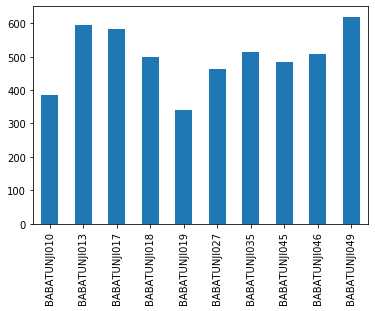

In [1226]:
train['Store_ID'].value_counts().sort_index().plot.bar()

Text(0.5, 1.0, 'STORE SIZE')

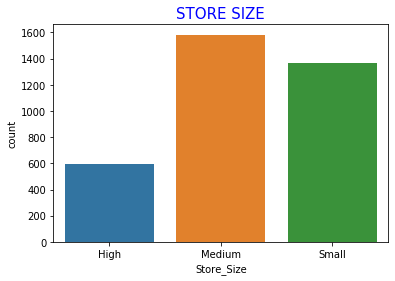

In [672]:
sns.countplot(train.Store_Size)
plt.title("STORE SIZE",color = 'blue',fontsize=15)

## BIVARIATE ANALYSIS

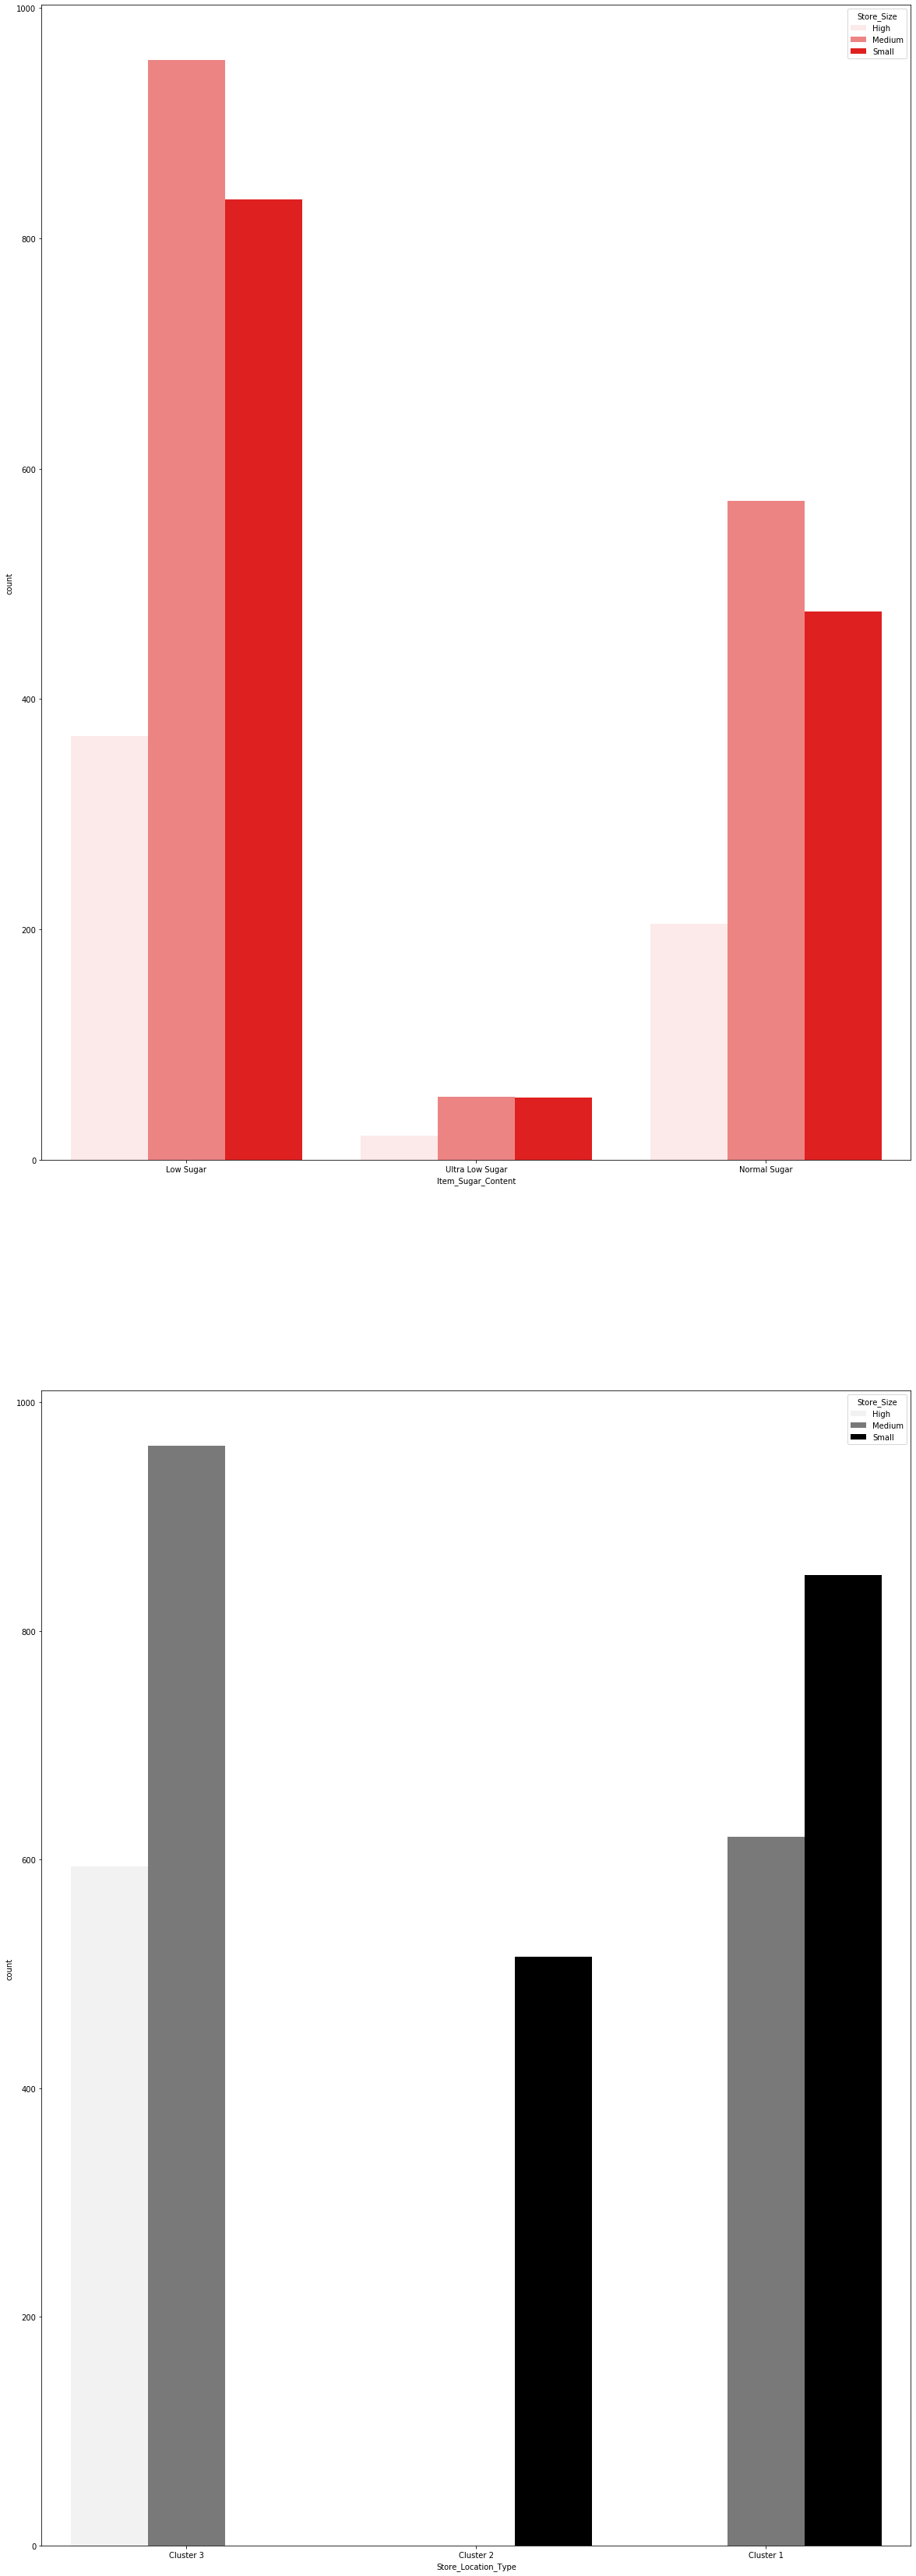

In [301]:
f, axes = plt.subplots(2, 1, figsize=[20, 60])
sns.countplot('Item_Sugar_Content', hue= 'Store_Size', data=train, ax=axes[0], color='red')
sns.countplot('Store_Location_Type', hue= 'Store_Size', data=train, ax=axes[1],color='black')

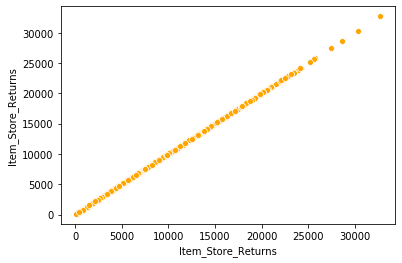

In [302]:
sns.scatterplot (x='Item_Store_Returns', y='Item_Store_Returns', data=train,color='orange')

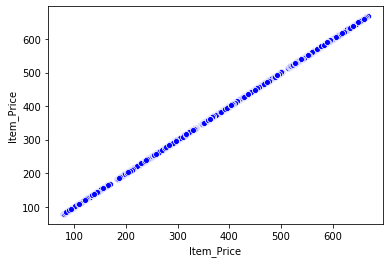

In [303]:
sns.scatterplot (x='Item_Price', y='Item_Price', data=train,color='blue')

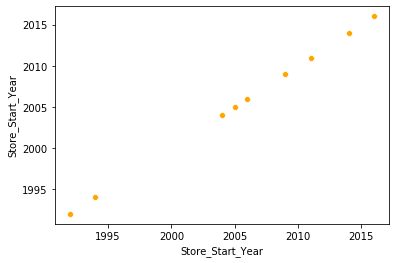

In [304]:
sns.scatterplot (x='Store_Start_Year', y='Store_Start_Year', data=train,color='orange')

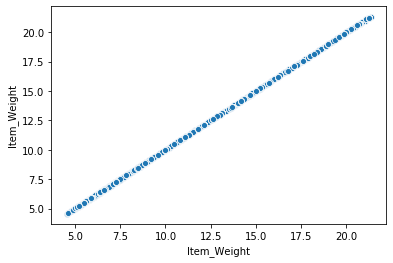

In [305]:
sns.scatterplot (x='Item_Weight', y='Item_Weight', data=train)

## FEATURE ENGINEERING

In [40]:
train['No of item units']=train['Item_ID'].map(train['Item_ID'].value_counts())
train['Item_sugar_level'] =train['Item_ID']+'_'+train['Item_Sugar_Content']
train['Sugar_level_Item_type'] =train['Item_Sugar_Content']+'_'+train['Item_Type']
train['Store_Existence_Age'] =2020 -train['Store_Start_Year']
train['Item_type_sold_per_location'] =train['Item_Type']+'_'+train['Store_Location_Type']
train['Store_Axis'] =train['Store_Type']+'_'+train['Store_Location_Type']

In [41]:
test['No of item units']=test['Item_ID'].map(test['Item_ID'].value_counts())
test['Item_sugar_level'] =test['Item_ID']+'_'+test['Item_Sugar_Content']
test['Sugar_level_Item_type'] =test['Item_Sugar_Content']+'_'+test['Item_Type']
test['Store_Existence_Age'] =2020 -test['Store_Start_Year']
test['Item_type_sold_per_location'] =test['Item_Type']+'_'+test['Store_Location_Type']
test['Store_Axis'] =test['Store_Type']+'_'+test['Store_Location_Type']

In [42]:
def is_visible(x):
    if x == 0:
        return 0
    else:
        return 1
train['is_item_visible']=train['Item_Visibility'].map(is_visible)

In [43]:
def is_visible_t(x):
    if x == 0:
        return 0
    else:
        return 1
test['is_item_visible']=test['Item_Visibility'].map(is_visible_t)

Text(0.5, 1.0, 'Age of Store')

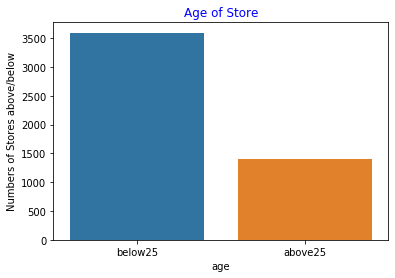

In [44]:
above25 =['above25' if i >= 25 else 'below25' for i in train['Store_Existence_Age']]
df = pd.DataFrame({'age':above25})
sns.countplot(x=df.age)
plt.ylabel('Numbers of Stores above/below')
plt.title('Age of Store',color = 'blue',fontsize=12)

In [45]:
train.fillna(method='bfill', inplace=True)
test.fillna(method='bfill', inplace=True)

## MULTIVARIATE ANALYSIS

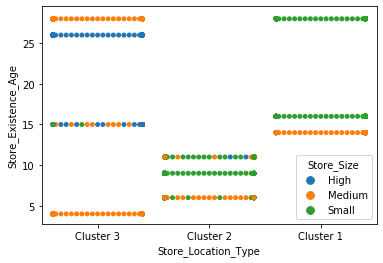

In [1288]:
sns.swarmplot(x="Store_Location_Type", y="Store_Existence_Age",hue="Store_Size", data=train)
plt.show()

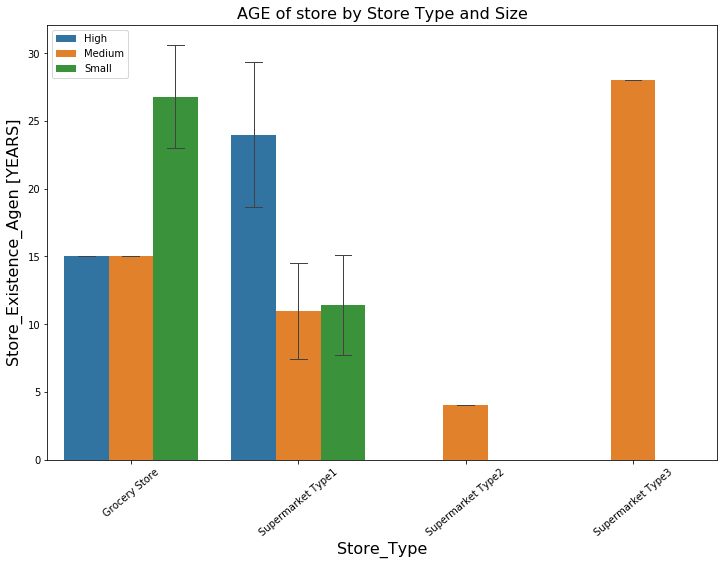

In [1289]:
plt.figure(figsize=(12, 8))
sns.barplot(x="Store_Type",
            y="Store_Existence_Age",
            hue="Store_Size",
            data=train,
            ci="sd",
            errwidth=1,
            capsize=0.1)
plt.title("AGE of store by Store Type and Size", fontsize=16)
plt.xlabel("Store_Type", fontsize=16)
plt.xticks(rotation=40)
plt.ylabel("Store_Existence_Agen [YEARS]", fontsize=16)
plt.legend(loc="upper left")
plt.show()

In [1290]:
#sns.factorplot(x="Store_Size", y="Item_Price", hue="Store_Existence_Age", col="Store_Location_Type",data=train, aspect=0.9, height=4, ci=95.0)

In [1291]:
train.columns

Index(['Item_ID', 'Store_ID', 'Item_Store_ID', 'Item_Weight',
       'Item_Sugar_Content', 'Item_Visibility', 'Item_Type', 'Item_Price',
       'Store_Start_Year', 'Store_Size', 'Store_Location_Type', 'Store_Type',
       'Item_Store_Returns', 'No of item units', 'Item_sugar_level',
       'Sugar_level_Item_type', 'Store_Existence_Age',
       'Item_type_sold_per_location', 'Store_Axis', 'is_item_visible'],
      dtype='object')

In [1292]:
#columns with object data types
object_dtypes = train.loc[:, train.dtypes == np.object];object_dtypes.columns

Index(['Item_ID', 'Store_ID', 'Item_Store_ID', 'Item_Sugar_Content',
       'Item_Type', 'Store_Size', 'Store_Location_Type', 'Store_Type',
       'Item_sugar_level', 'Sugar_level_Item_type',
       'Item_type_sold_per_location', 'Store_Axis'],
      dtype='object')

In [46]:
import category_encoders as ce
oce = ce.OneHotEncoder(cols=['Store_Size'])
hce = ce.TargetEncoder(cols=['Store_ID', 'Item_Sugar_Content',
       'Item_Type', 'Store_Location_Type', 'Store_Type',
       'Item_sugar_level', 'Sugar_level_Item_type',
       'Item_type_sold_per_location', 'Store_Axis'],smoothing=40,min_samples_leaf=7)

In [47]:
train.columns

Index(['Item_ID', 'Store_ID', 'Item_Store_ID', 'Item_Weight',
       'Item_Sugar_Content', 'Item_Visibility', 'Item_Type', 'Item_Price',
       'Store_Start_Year', 'Store_Size', 'Store_Location_Type', 'Store_Type',
       'Item_Store_Returns', 'No of item units', 'Item_sugar_level',
       'Sugar_level_Item_type', 'Store_Existence_Age',
       'Item_type_sold_per_location', 'Store_Axis', 'is_item_visible'],
      dtype='object')

In [48]:
to_drop=['Item_ID','is_item_visible','Item_Store_ID','Item_Weight','Item_Visibility']
test.drop(to_drop, axis=1, inplace=True)
train.drop(to_drop, axis=1, inplace=True)

In [49]:
X=train.drop(['Item_Store_Returns'], axis=1)
y=train.Item_Store_Returns

In [50]:
X = oce.fit_transform(X)
X = hce.fit_transform(X,y)
test = oce.transform(test)
test = hce.transform(test)

In [51]:
X["combiner"] = 1

In [52]:
data = pd.concat([X, test])

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [1349]:
to_cluster=['Item_sugar_level','Item_type_sold_per_location','Store_Existence_Age',
            'Store_Location_Type', 'Store_Size_1', 'Store_Size_2', 'Store_Size_3']

In [1350]:
data.columns

Index(['Item_Price', 'Item_Sugar_Content', 'Item_Type', 'Item_sugar_level',
       'Item_type_sold_per_location', 'No of item units', 'Store_Axis',
       'Store_Existence_Age', 'Store_ID', 'Store_Location_Type',
       'Store_Size_1', 'Store_Size_2', 'Store_Size_3', 'Store_Start_Year',
       'Store_Type', 'Sugar_level_Item_type', 'combiner'],
      dtype='object')

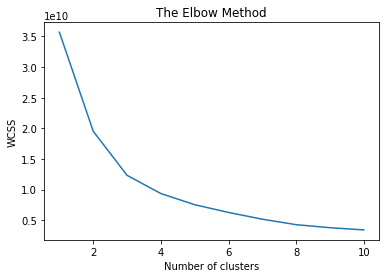

In [1487]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',algorithm='auto',  n_jobs=1, random_state=1996, 
                    tol=0.0001, verbose=0, precompute_distances='auto')
    kmeans.fit(data[to_cluster])
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [1302]:
to_cluster=['Item_sugar_level','Item_type_sold_per_location','Store_Existence_Age',
            'Store_Location_Type', 'Store_Size_1', 'Store_Size_2', 'Store_Size_3']

In [55]:
X=data[data.combiner.notnull()].reset_index(drop=True)
test=data[data.combiner.isna()].reset_index(drop=True)

In [56]:
y_target = pd.DataFrame({'target':y})

In [57]:
template_data= pd.concat([X,y_target], axis=1)

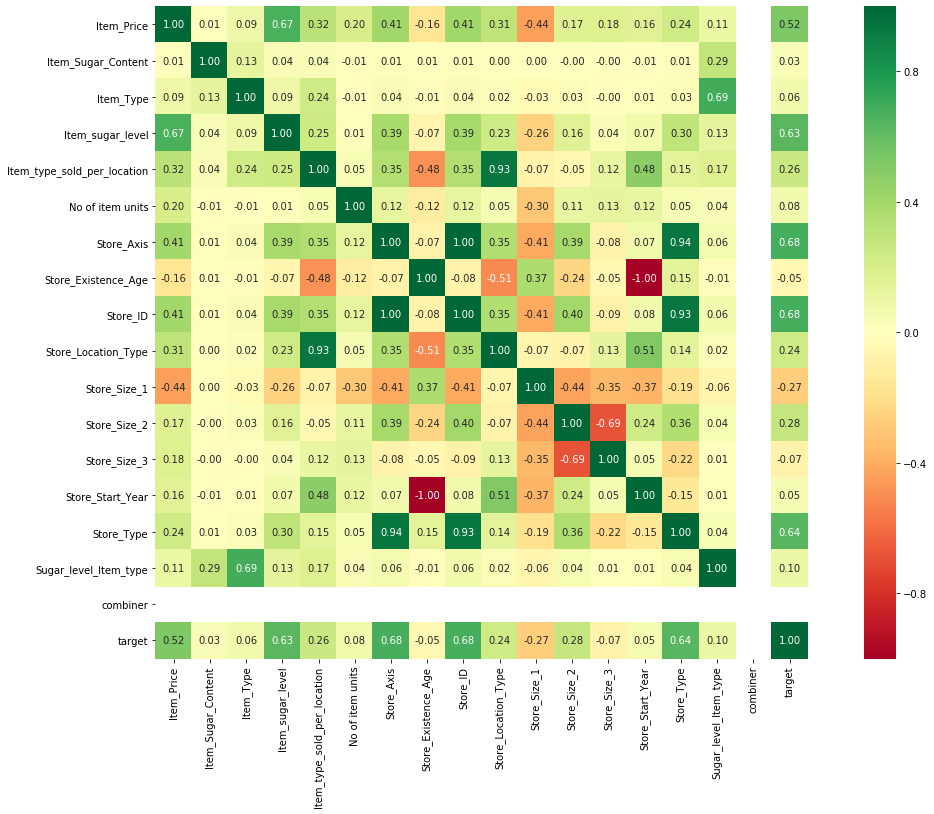

In [58]:
corrmat =template_data.corr()
f, ax = plt.subplots(figsize=(20,12))
sns.heatmap(template_data.corr(), square=True, cmap=plt.cm.RdYlGn, annot=True, fmt=".2f")

In [59]:
X.drop(['Store_Size_1','Store_Start_Year','Store_ID'], axis=1, inplace =True)
test.drop(['Store_Size_1','Store_Start_Year','Store_ID'], axis=1, inplace =True)

In [60]:
test.columns

Index(['Item_Price', 'Item_Sugar_Content', 'Item_Type', 'Item_sugar_level',
       'Item_type_sold_per_location', 'No of item units', 'Store_Axis',
       'Store_Existence_Age', 'Store_Location_Type', 'Store_Size_2',
       'Store_Size_3', 'Store_Type', 'Sugar_level_Item_type', 'combiner'],
      dtype='object')

In [66]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=12345)

In [67]:
from lightgbm import LGBMRegressor

In [78]:
param = { 
         'objective':'regression',
         'max_depth': -1, #depth 4, 0.03
         'learning_rate': 0.1,
         "boosting": "gbdt",
        "feature_fraction": 0.9,
         "metric": 'rmse',
        'seed':12345,
         "verbose": 0}

In [79]:
errcb=[]
y_pred_totcb=[]
fold=RepeatedKFold(n_splits=4, random_state=1992, n_repeats=4)
i=1

for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m=LGBMRegressor(**param)
    m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_val, y_val)],verbose=100, early_stopping_rounds=300)
    preds=m.predict(X_test)
    print("err: ",np.sqrt(mean_squared_error(y_test,preds)))
    errcb.append(np.sqrt(mean_squared_error(y_test,preds)))
    p = m.predict(test)
    y_pred_totcb.append(p)

Training until validation scores don't improve for 300 rounds
[100]	training's rmse: 2004.58	valid_1's rmse: 2199.47
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 2004.58	valid_1's rmse: 2199.47
err:  2839.04630379034
Training until validation scores don't improve for 300 rounds
[100]	training's rmse: 2017.27	valid_1's rmse: 2223.06
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 2017.27	valid_1's rmse: 2223.06
err:  2771.0701712123264
Training until validation scores don't improve for 300 rounds
[100]	training's rmse: 2034.44	valid_1's rmse: 2237.81
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 2034.44	valid_1's rmse: 2237.81
err:  2704.771251063934
Training until validation scores don't improve for 300 rounds
[100]	training's rmse: 2031.03	valid_1's rmse: 2193.2
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 2031.03	valid_1's rmse: 2193.2
err:  2724.6505590521183
Training until validation

In [80]:
np.mean(errcb)

2753.858730115964

# FEATURE IMPORTANCE

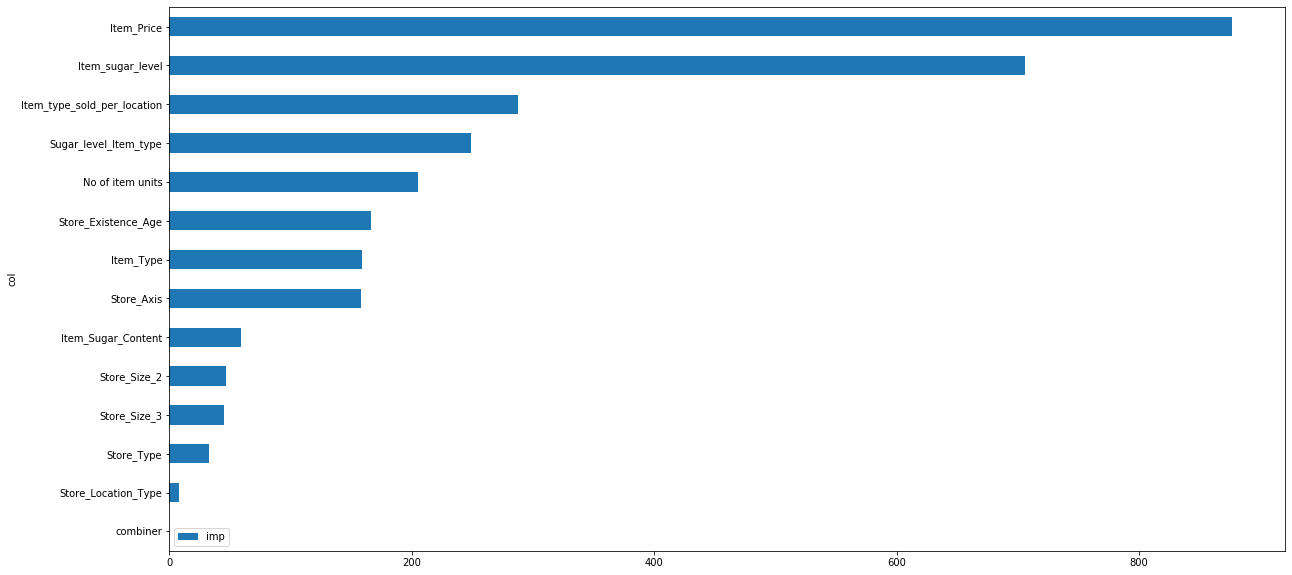

In [81]:
fea_imp = pd.DataFrame({'imp':m.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
plt.savefig('LGBM_feature_importance.png')     

# PREDICTION LINE

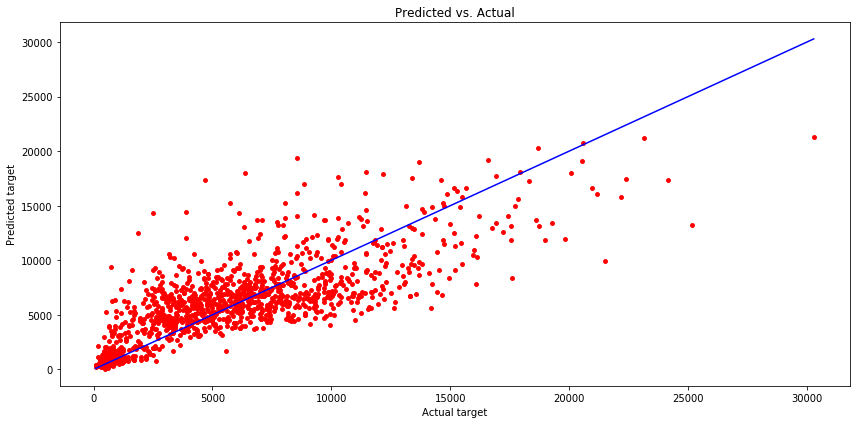

In [82]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, preds, s=15, color='red')
plt.title('Predicted vs. Actual')
plt.xlabel('Actual target')
plt.ylabel('Predicted target')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],'blue')
plt.tight_layout()

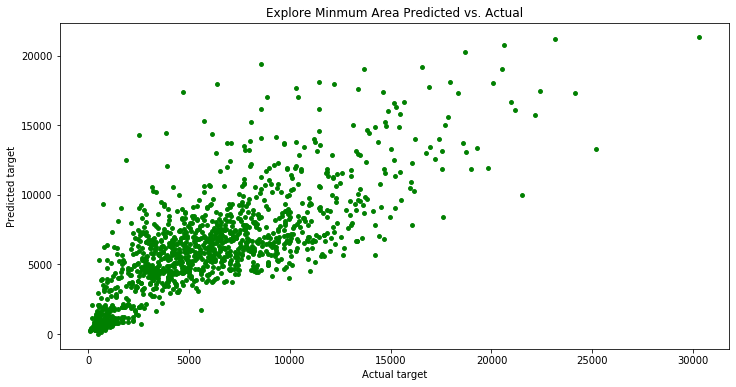

In [83]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, preds, s=15, color='green')
plt.title('Explore Minmum Area Predicted vs. Actual')
plt.xlabel('Actual target')
plt.ylabel('Predicted target')
plt.plot(min(y_test), min(y_test))

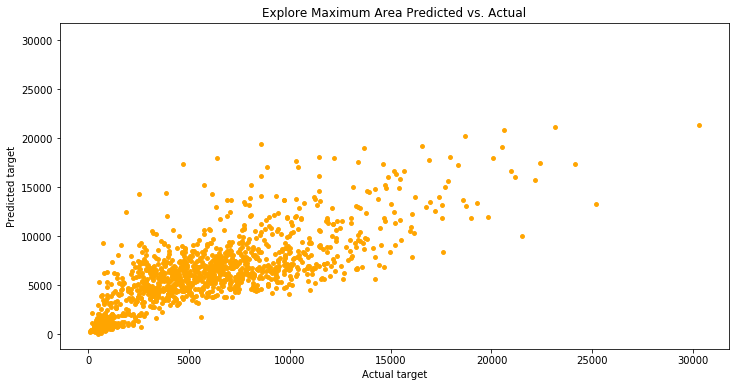

In [84]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, preds, s=15, color='orange')
plt.title('Explore Maximum Area Predicted vs. Actual')
plt.xlabel('Actual target')
plt.ylabel('Predicted target')
plt.plot(max(y_test), max(y_test))

In [85]:
x = {"Item_Store_ID": submission['Item_Store_ID'], 'Item_Store_Returns': np.mean(y_pred_totcb, 0)}
test_predictions = pd.DataFrame(data=x)
test_predictions = test_predictions[["Item_Store_ID", 'Item_Store_Returns']]

In [86]:
test_predictions.head()

,Item_Store_ID,Item_Store_Returns
0,DRA59_BABATUNJI010,1365.286565
1,DRA59_BABATUNJI013,7629.707144
2,DRB01_BABATUNJI013,3891.141016
3,DRB13_BABATUNJI010,819.680436
4,DRB13_BABATUNJI013,5912.544094


In [87]:
test_predictions.to_csv('Baseline.csv', index=False)